**Nome:** Iran Freitas Ribeiro

**Matrícula:** 20212021241588

**Disciplina:** TEI - Estatística Aplicada

**Professor:** Celso José Munaro

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import norm, ttest_rel, chi2, t, ttest_ind, f
import matplotlib.pyplot as plt

In [3]:
plt.style.use('seaborn')
def CI(mu1, mu2, var1, var2, n1, n2, alpha=0.05):
    """
    Calcula o intervalo de confiança de uma distribuição normal
    """
    zalpha_2  = norm.ppf(alpha/2)
    sqrt_ = (var1/n1) + (var2/n2)
    ci_d = (mu1-mu2) - zalpha_2*np.sqrt(sqrt_) # limite superior    
    ci_l = (mu1-mu2) + zalpha_2*np.sqrt(sqrt_) # limite inferior
    return ci_l, ci_d

def get_XY(f, v=1):
    np.random.seed(42)
    N = np.random.randint(1,11)
    sx=0.1*N
    sy=v*sx
    mx = N+f*0.1*N
    my = N
    Xrand = np.random.normal(loc=mx, scale=np.sqrt(sx), size=1000)
    Yrand = np.random.normal(loc=my, scale=np.sqrt(sy), size=1000)
    return Xrand, mx, sx, Yrand, my, sy

def test_estatistico(m1, m2, delta0, s1, s2, n1, n2):
    num = m1 - m2 - delta0
    denom = np.sqrt((s1/n1) + (s2/n2))
    return num/denom

# Questão 1

In [258]:
def pvalue(z0):
    return 1 - norm.cdf(z0)
def testar_f(f=0.1, alpha=0.05, n=20):
    r = {}
    palpha = norm.ppf(1-alpha)
    Xf, mx, sx, Yf, my, sy = get_XY(f)
    amostraX = np.random.choice(Xf, size=n)
    amostraY = np.random.choice(Yf, size=n)
    m1, m2 = [np.mean(amostraX), np.mean(amostraY)]
    s1, s2 = [amostraX.var(ddof=1), amostraY.var(ddof=1)]
    z0 = test_estatistico(m1, m2, 0, s1=s1, s2=s2, n1=n, n2=n)
    if (z0 > palpha):
        print ("Rejeitar hipótese nula",end="")
    else:
        print ("Não rejeitar hipótese nula",end="")
    pv = pvalue(z0)
    r['x'], r['y'] = [amostraX,amostraY]
    r['mx'], r['my'] = [mx, my]
    r['sx'], r['sy'] = [sx, sy]
    r['z0'] = z0
    r['pvalue'] = pv
    return r, z0, pv

# def std_diff(std1, std2, n1, n2):
#     return np.sqrt((std1**2/n1) + (std2**2/n2))

def std_diff(var1, var2, n1, n2):
    return np.sqrt((var1/n1) + (var2/n2))


def erro_I(ci, mu, std):
    """
    Diferença entre as médias/pelo desvio padrão    
    """
    ee = norm.cdf(ci[0], loc=mu, scale=std)
    ed = 1 - norm.cdf(ci[1], loc=mu, scale=std)
    return ee+ed

def erro_II(alpha, m1, m2, var1, var2, n1, n2, delta0):
    """
    delta0: hipotese alternativa
    """
    delta = m1-m2   
    z_a2 = norm.ppf(1-(alpha/2))
    denom = np.sqrt((var1/n1) + (var2/n2))
    c1 = (z_a2 - (delta-delta0)/denom)
    c2 = (-z_a2 - (delta-delta0)/denom)
    e = norm.cdf(c1) - norm.cdf(c2)
    return e

## Testes com $n=20$

A hipótese nula é de que as médias de duas distribuições $X$ e $Y$, sejam iguais. Assim, temos os casos onde as distribuições obtidas rejeitam e não rejeitam a hipótese nula.

### Rejeitando $H_0$

No primeiro caso, consirando $f=2$, a hipótese nula é rejeitada, com o teste estatístico $Z_0 = 3.58$ e $P$-value $=0.0002$.

In [259]:
r, test, pv = testar_f(f=2)
print (" com teste={:.4f} e p-value={:.4f}".format(test, pv))

Rejeitar hipótese nula com teste=3.5865 e p-value=0.0002


A código a seguir calcula o intervalo de confiança, erro tipo I e produz a Figura $1$ que mostra os resultados. O intervalo de confiança para a diferença entre as médias das duas distribuições é (0.426, 1.452) o erro tipo I = $1.0$. Dado que a média da diferença entre as distribuições $0.94$ está bem distante de $0$, é esperado que o erro tipo I seja alto.

Intervalo de confiança: (0.426, 1.452)
Erro tipo I: 0.050


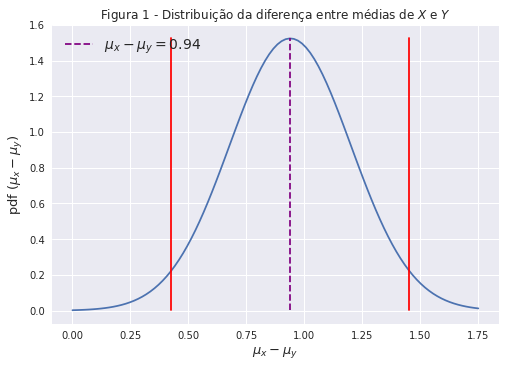

In [260]:
ci_rx = CI(r['x'].mean(), r['y'].mean(),  r['x'].var(ddof=1), r['y'].var(ddof=1), 20, 20)
print ("Intervalo de confiança: ({:.3f}, {:.3f})".format(ci_rx[0],ci_rx[1]))


stdif_r = std_diff(r['x'].var(ddof=1),r['y'].var(ddof=1),20, 20)
diff_mur = r['x'].mean() - r['y'].mean()
Xis_r = np.linspace(0, 1.75, 100)
Xis_rx = np.linspace(-0.75, 1.5, 100)
pdfx_r = [norm.pdf(xi, loc=diff_mur, scale=stdif_r) for xi in Xis_r]
pdfx2_r = [norm.pdf(xi, loc=ci_rx[0], scale=stdif_r) for xi in Xis_rx]

ei_r = erro_I(ci_rx, mu=diff_mur, std=stdif_r)
print ("Erro tipo I: {:.3f}".format(ei_r))


fig, ax = plt.subplots()
ax.plot(Xis_r, pdfx_r,)
lim_inf, lim_sup = [np.min(pdfx_r), np.max(pdfx_r)]
one_x12, one_y12 = [ci_rx[0],ci_rx[0]],[lim_inf,lim_sup]
two_x12, two_y12 = [ci_rx[1],ci_rx[1]],[lim_inf,lim_sup]

m_x12, my12 = [diff_mur, diff_mur], [lim_inf,lim_sup]
ax.plot(one_x12, one_y12, two_x12, two_y12, color='red')
ax.plot(m_x12, my12, color='purple', ls='--', label=r'$\mu_x - \mu_y = 0.94$')
ax.set_xlabel("$\mu_x - \mu_y$", fontdict={'fontsize':13})
ax.set_ylabel("pdf ($\mu_x - \mu_y$)", fontdict={'fontsize':13})
plt.legend(loc='upper left', prop={'size': 14})
plt.title("Figura 1 - Distribuição da diferença entre médias de $X$ e $Y$");

Para o cálculo do erro tipo II, considere a hipótese $H_1$ de que diferença das médias da distribuição está um pouco mais próxima de zero ($H_1: \mu=0.42$). Nesse caso, temos um erro tipo II = $0.95$. Como mostra a Figura 2.

Erro tipo II 0.9500
Intervalo de confiança $H_1$: (-0.087, 0.939)


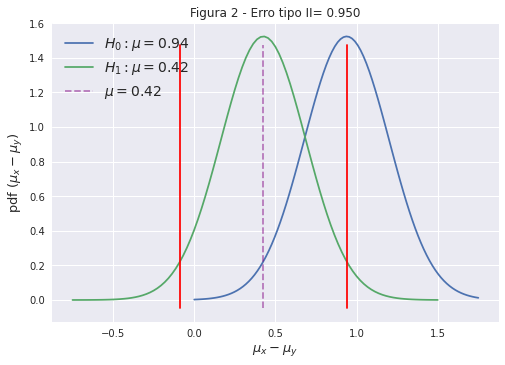

In [261]:
mudiff = diff_mur - ci_rx[0]
eii = erro_II(0.05, diff_mur, ci_rx[0], stdif_r**2, stdif_r**2, 20, 20, mudiff)
print ("Erro tipo II {:.4f}".format(eii))
ci_eii = norm.interval(0.95, loc=ci_rx[0], scale=stdif_r)
print ("Intervalo de confiança $H_1$: ({:.3f}, {:.3f})".format(ci_eii[0], ci_eii[1]))
fig, ax = plt.subplots()
ax.plot(Xis_r, pdfx_r, label=r'$H_0: \mu=0.94$')
ax.plot(Xis_rx, pdfx2_r,label=r'$H_1: \mu=0.42$')
lim_inf, lim_sup = [np.min(pdfx_r), np.max(pdfx_r)]
one_x12, one_y12 = [ci_eii[0],ci_eii[0]],[lim_inf-0.05,lim_sup-0.05]
two_x12, two_y12 = [ci_eii[1],ci_eii[1]],[lim_inf-0.05,lim_sup-0.05]

mh1_x, mh1y = [ci_rx[0], ci_rx[0]], [lim_inf-0.05,lim_sup-0.05]
ax.plot(one_x12, one_y12, two_x12, two_y12, color='red')
ax.plot(mh1_x, mh1y, color='purple', alpha=0.5, ls='--', label='$\mu=0.42$')
ax.set_xlabel("$\mu_x - \mu_y$", fontdict={'fontsize':13})
ax.set_ylabel("pdf ($\mu_x - \mu_y$)", fontdict={'fontsize':13})
plt.legend(loc='upper left', prop={'size':14})
plt.title("Figura 2 - Erro tipo II= {:.3f}".format(eii));

### Não rejeitar $H_0$

Para o segundo caso, considerando $f=0.3$, o código a seguir gera distribuições que não rejeitam a hipótese nula, com teste estatístico $Z_0 = -0.96$ e $P$-value=$0.83$

In [262]:
nr, n_test, n_pv = testar_f(f=0.3)
print (" com teste={:.4f} e p-value={:.4f}".format(n_test, n_pv))

Não rejeitar hipótese nula com teste=-0.9593 e p-value=0.8313


Já que não foi possível rejeitar a hipótese nula, a diferença das médias das distribuições devem estar em um intervalo de confiança normalmente distribuído com média $0$. Assim, o código a seguir calcula o intervalo de confiança da diferença entre as médias.

Erro tipo I 0.070


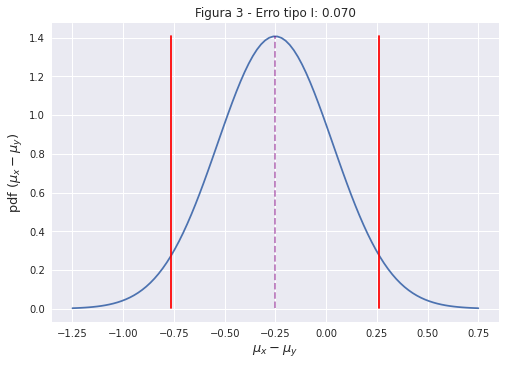

In [263]:
# calcula o intervalo de confiança
ci_nrx = CI(nr['x'].mean(), nr['y'].mean(), nr['x'].var(ddof=1), nr['y'].var(ddof=1), 20, 20)

# variaveis para plotagem
Xis = np.linspace(-1.25,0.75,100)
stdif = std_diff(nr['x'].std(),nr['y'].std(),20, 20)
m_dif = nr['x'].mean()-nr['y'].mean()
pdf_nrj = [norm.pdf(xi, loc=m_dif, scale=stdif) for xi in Xis]

# erro tipo I
ei_nr = erro_I(ci_nrx, mu=m_dif, std=stdif)
print ("Erro tipo I {:.3f}".format(ei_nr))

fig, ax = plt.subplots()
ax.plot(Xis, pdf_nrj)
lim_inf, lim_sup = [np.min(pdf_nrj), np.max(pdf_nrj)]
one_x12, one_y12 = [ci_nrx[0],ci_nrx[0]],[lim_inf,lim_sup]
two_x12, two_y12 = [ci_nrx[1],ci_nrx[1]],[lim_inf,lim_sup]
mh0x, mh0y = [m_dif, m_dif],[lim_inf,lim_sup]
ax.plot(one_x12, one_y12, two_x12, two_y12, color='red')
ax.plot(mh0x, mh0y, color='purple', alpha=0.5, ls='--')
ax.set_xlabel("$\mu_x - \mu_y$", fontdict={'fontsize':13})
ax.set_ylabel("pdf ($\mu_x - \mu_y$)", fontdict={'fontsize':13})
plt.title("Figura 3 - Erro tipo I: {:.3f}".format(ei_nr));

Para obter o erro tipo II, considerando que a não conseguimos rejeitar a hipótese nula (as distribuições possuem a mesma média), podemos supor uma hipótese $H_1$ de que a distribuição da diferença entre as médias seja diferente de $0$. Suponha, então, que a distribuição da diferença tenha $\mu=0.26$ (limite superior do intervalo de confiança obtido anteriormente). A Figura $4$ a seguir mostra o erro tipo II considerando $H_1$.

In [88]:
m_dif

-0.25112819934947783

Erro tipo II 0.000
Intervalo de confiança H_1: (-0.294, 0.818)


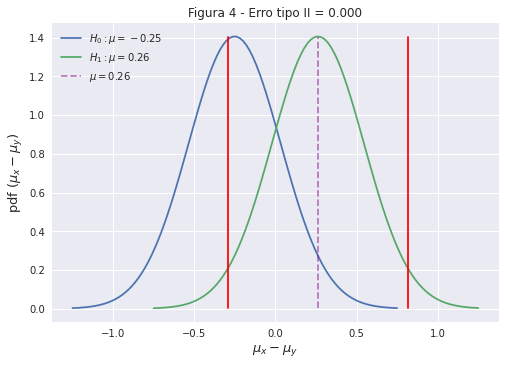

In [96]:
Xis2 = np.linspace(-0.75, 1.25, 100)
pdf_nrj2 = [norm.pdf(xi, loc=ci_nrx[1], scale=stdif) for xi in Xis2]

eii_nrj = erro_II(0.05, m_dif, ci_nrx[1], stdif**2, stdif**2, 20, 20, (ci_nrx[1]-m_dif))
print ("Erro tipo II {:.3f}".format(eii_nrj))

ci_eii = norm.interval(0.95, loc=ci_nrx[1], scale=stdif)
print ("Intervalo de confiança H_1: ({:.3f}, {:.3f})".format(ci_eii[0], ci_eii[1]))
fig, ax = plt.subplots()
lim_inf, lim_sup = [np.min(pdf_nrj), np.max(pdf_nrj)]
ax.plot(Xis, pdf_nrj, label=r'$H_0: \mu=-0.25$')
ax.plot(Xis2, pdf_nrj2, label=r'$H_1: \mu=0.26$')

one_x12, one_y12 = [ci_eii[0],ci_eii[0]],[lim_inf,lim_sup]
two_x12, two_y12 = [ci_eii[1],ci_eii[1]],[lim_inf,lim_sup]

mh1_x, mh1_y = [ci_nrx[1], ci_nrx[1]],[lim_inf,lim_sup]
ax.plot(one_x12, one_y12, two_x12, two_y12, color='red')
ax.plot(mh1_x, mh1_y, color='purple', ls='--', alpha=0.5, label=r'$\mu=0.26$')
ax.set_xlabel("$\mu_x - \mu_y$", fontdict={'fontsize':13})
ax.set_ylabel("pdf ($\mu_x - \mu_y$)", fontdict={'fontsize':13})
plt.legend()
plt.title("Figura 4 - Erro tipo II = {:.3f}".format(eii_nrj));

## Testes com $n=100$

Como anteriormente, a hipótese nula é de que as médias de duas distribuições $X$ e $Y$, sejam iguais. Nesse caso, para 100 amostras. Assim, temos os casos onde as distribuições obtidas rejeitam e não rejeitam a hipótese nula.

### Rejeitando $h_0$

No primeiro caso, mantendo $f=2$, a hipótese nula é ainda rejeitada, com o teste estatístico $Z_0 = 12.13$ e $P$-value $=0.000$.

In [264]:
r, test, pv = testar_f(f=2, n=100)
print (" com teste={:.4f} e p-value={:.4f}".format(test, pv))

Rejeitar hipótese nula com teste=12.1380 e p-value=0.0000


A código a seguir calcula o intervalo de confiança, erro tipo I e produz a Figura $5$ que mostra os resultados. 
O intervalo de confiança para a diferença entre as médias das duas distribuições é (1.273, 1.764) o erro tipo I = $1.0$. Nota-se que aumentando o tamanho das amostras, a diferença entre as médias das distribuições ficou ainda mais distante de $0$.

Intervalo de confiança: (1.273, 1.763)
mux - muy = 1.518
Erro tipo I: 0.050


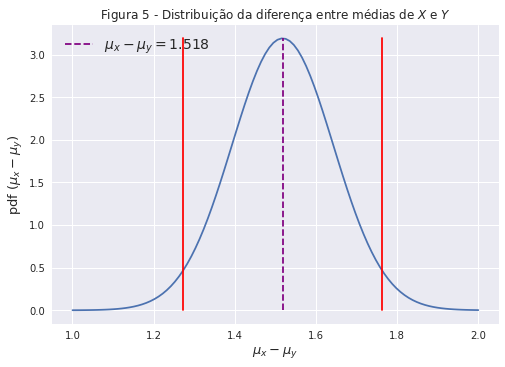

In [265]:
ci_rx = CI(r['x'].mean(), r['y'].mean(),  r['x'].var(ddof=1), r['y'].var(ddof=1), 100, 100)
print ("Intervalo de confiança: ({:.3f}, {:.3f})".format(ci_rx[0],ci_rx[1]))


stdif_r = std_diff(r['x'].var(ddof=1),r['y'].var(ddof=1),100, 100)
diff_mur = r['x'].mean() - r['y'].mean()
print ("mux - muy = {:.3f}".format(diff_mur))
Xis_r = np.linspace(1, 2, 100)
Xis_rx = np.linspace(0.75, 1.75, 100)
pdfx_r = [norm.pdf(xi, loc=diff_mur, scale=stdif_r) for xi in Xis_r]
pdfx2_r = [norm.pdf(xi, loc=ci_rx[0], scale=stdif_r) for xi in Xis_rx]
ei_r = erro_I(ci_rx, mu=diff_mur, std=stdif_r)
print ("Erro tipo I: {:.3f}".format(ei_r))

fig, ax = plt.subplots()
ax.plot(Xis_r, pdfx_r,)
lim_inf, lim_sup = [np.min(pdfx_r), np.max(pdfx_r)]
one_x12, one_y12 = [ci_rx[0],ci_rx[0]],[lim_inf,lim_sup]
two_x12, two_y12 = [ci_rx[1],ci_rx[1]],[lim_inf,lim_sup]

m_x12, my12 = [diff_mur, diff_mur], [lim_inf,lim_sup]
ax.plot(one_x12, one_y12, two_x12, two_y12, color='red')
ax.plot(m_x12, my12, color='purple', ls='--', label=r'$\mu_x - \mu_y = 1.518$')
ax.set_xlabel("$\mu_x - \mu_y$", fontdict={'fontsize':13})
ax.set_ylabel("pdf ($\mu_x - \mu_y$)", fontdict={'fontsize':13})
plt.legend(loc='upper left', prop={'size': 14})
plt.title("Figura 5 - Distribuição da diferença entre médias de $X$ e $Y$");

In [204]:
diff_mur, mudiff, ci_rx[0]

(1.517780519696176, 0.24508031079731762, 1.2727002088988584)

Para o cálculo do erro tipo II, considere a hipótese $H_1$ de que diferença das médias da distribuição está um pouco mais próxima de zero ($H_1: \mu=0.24$). Novamente, temos um erro tipo II = $0.95$. Como mostra a Figura 6.

Erro tipo II 0.9500
Intervalo de confiança $H_1$: (1.028, 1.518)


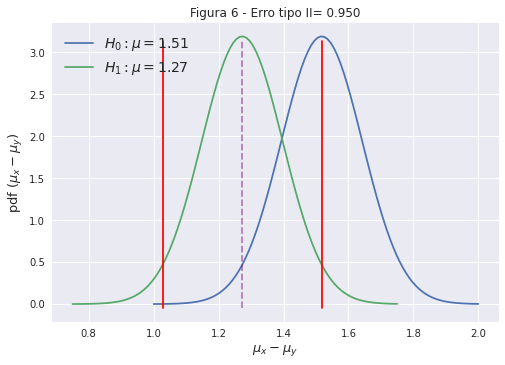

In [205]:
mudiff = diff_mur - ci_rx[0]
eii = erro_II(0.05, diff_mur, ci_rx[0], stdif_r**2, stdif_r**2, 100, 100, mudiff)
print ("Erro tipo II {:.4f}".format(eii))
ci_eii = norm.interval(0.95, loc=ci_rx[0], scale=stdif_r)
print ("Intervalo de confiança $H_1$: ({:.3f}, {:.3f})".format(ci_eii[0], ci_eii[1]))
fig, ax = plt.subplots()
ax.plot(Xis_r, pdfx_r, label=r'$H_0: \mu=1.51$')
ax.plot(Xis_rx, pdfx2_r,label=r'$H_1: \mu=1.27$')
lim_inf, lim_sup = [np.min(pdfx_r), np.max(pdfx_r)]
one_x12, one_y12 = [ci_eii[0],ci_eii[0]],[lim_inf-0.05,lim_sup-0.05]
two_x12, two_y12 = [ci_eii[1],ci_eii[1]],[lim_inf-0.05,lim_sup-0.05]

mh1_x, mh1y = [ci_rx[0], ci_rx[0]], [lim_inf-0.05,lim_sup-0.05]
ax.plot(one_x12, one_y12, two_x12, two_y12, color='red')
ax.plot(mh1_x, mh1y, color='purple', alpha=0.5, ls='--')
ax.set_xlabel("$\mu_x - \mu_y$", fontdict={'fontsize':13})
ax.set_ylabel("pdf ($\mu_x - \mu_y$)", fontdict={'fontsize':13})
plt.legend(loc='upper left', prop={'size':14})
plt.title("Figura 6 - Erro tipo II= {:.3f}".format(eii));

### Não rejeitando $H_0$

Para o segundo caso, considerando $f=-0.2$, o código a seguir gera distribuições que não rejeitam a hipótese nula, 
com teste estatístico $Z_0 = -0.17$ e $P$-value=$0.57$

In [266]:
nr, n_test, n_pv = testar_f(f=-0.2, n=100)
print (" com teste={:.4f} e p-value={:.4f}".format(n_test, n_pv))

Não rejeitar hipótese nula com teste=-0.1777 e p-value=0.5705


Já que não foi possível rejeitar a hipótese nula, a diferença das médias das distribuições devem estar em um intervalo de confiança normalmente distribuído com média $0$.
Assim, o código a seguir calcula o intervalo de confiança da diferença entre as médias.

Intervalo de confiança (-0.267, 0.223)
Erro tipo I 0.050


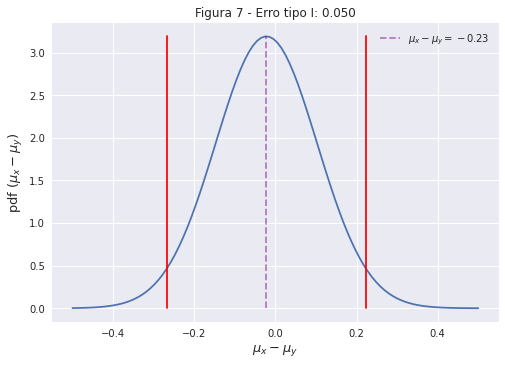

In [267]:
# calcula o intervalo de confiança
ci_nrx = CI(nr['x'].mean(), nr['y'].mean(), nr['x'].var(ddof=1), nr['y'].var(ddof=1), 100, 100)
print ("Intervalo de confiança ({:.3f}, {:.3f})".format(ci_nrx[0], ci_nrx[1]))
# variaveis para plotagem
Xis = np.linspace(-.5,.5,100)
stdif = std_diff(nr['x'].var(ddof=1),nr['y'].var(ddof=1),100, 100)
m_dif = nr['x'].mean()-nr['y'].mean()
pdf_nrj = [norm.pdf(xi, loc=m_dif, scale=stdif) for xi in Xis]
# erro tipo I
ei_nr = erro_I(ci_nrx, mu=m_dif, std=stdif)
print ("Erro tipo I {:.3f}".format(ei_nr))

fig, ax = plt.subplots()
ax.plot(Xis, pdf_nrj)
lim_inf, lim_sup = [np.min(pdf_nrj), np.max(pdf_nrj)]
one_x12, one_y12 = [ci_nrx[0],ci_nrx[0]],[lim_inf,lim_sup]
two_x12, two_y12 = [ci_nrx[1],ci_nrx[1]],[lim_inf,lim_sup]
mh0x, mh0y = [m_dif, m_dif],[lim_inf,lim_sup]
ax.plot(one_x12, one_y12, two_x12, two_y12, color='red')
ax.plot(mh0x, mh0y, color='purple', alpha=0.5, ls='--', label='$\mu_x - \mu_y = -0.23$')
ax.set_xlabel("$\mu_x - \mu_y$", fontdict={'fontsize':13})
ax.set_ylabel("pdf ($\mu_x - \mu_y$)", fontdict={'fontsize':13})
plt.legend()
plt.title("Figura 7 - Erro tipo I: {:.3f}".format(ei_nr));

A Figura $7$ mostra que o intervalo de confiança para a diferença das médias é ($-0.267, 0.223$) com erro tipo I = 0.107

In [207]:
m_dif,ci_nrx

(-0.022219480303823147, (-0.26729979110114077, 0.22286083049349445))

Para obter o erro tipo II, considerando que a não conseguimos rejeitar a hipótese nula (as distribuições possuem a mesma média), 
podemos supor uma hipótese $H_1$ de que a distribuição da diferença entre as médias seja diferente de $0$. 
Suponha, então, que a diferença tenha uma distribuição com média $\mu=0.22$. 
A Figura $8$ a seguir mostra o erro tipo II considerando $H_1$.

Erro tipo II 0.000
Intervalo de confiança H_1: (-0.022, 0.468)


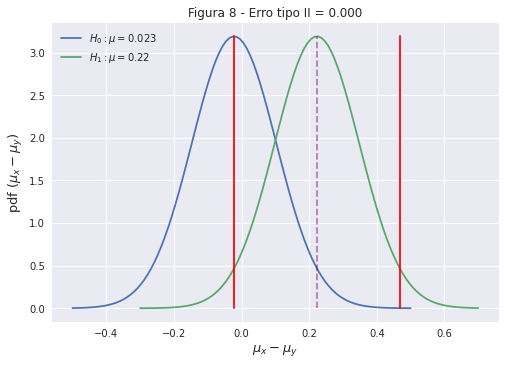

In [176]:
Xis2 = np.linspace(-0.3, 0.7, 100)
pdf_nrj2 = [norm.pdf(xi, loc=ci_nrx[1], scale=stdif) for xi in Xis2]

eii_nrj = erro_II(0.05, m_dif, ci_nrx[1], stdif**2, stdif**2, 100, 100, (ci_nrx[1]-m_dif))
print ("Erro tipo II {:.3f}".format(eii_nrj))

ci_eii = norm.interval(0.95, loc=ci_nrx[1], scale=stdif)
print ("Intervalo de confiança H_1: ({:.3f}, {:.3f})".format(ci_eii[0], ci_eii[1]))
fig, ax = plt.subplots()
lim_inf, lim_sup = [np.min(pdf_nrj), np.max(pdf_nrj)]
ax.plot(Xis, pdf_nrj, label=r'$H_0: \mu=0.023$')
ax.plot(Xis2, pdf_nrj2, label=r'$H_1: \mu=0.22$')

one_x12, one_y12 = [ci_eii[0],ci_eii[0]],[lim_inf,lim_sup]
two_x12, two_y12 = [ci_eii[1],ci_eii[1]],[lim_inf,lim_sup]

mh1_x, mh1_y = [ci_nrx[1], ci_nrx[1]],[lim_inf,lim_sup]
ax.plot(one_x12, one_y12, two_x12, two_y12, color='red')
ax.plot(mh1_x, mh1_y, color='purple', ls='--', alpha=0.5)
ax.set_xlabel("$\mu_x - \mu_y$", fontdict={'fontsize':13})
ax.set_ylabel("pdf ($\mu_x - \mu_y$)", fontdict={'fontsize':13})
plt.legend()
plt.title("Figura 8 - Erro tipo II = {:.3f}".format(eii_nrj));

Assim, a Figura $8$ mostra que quando $\mu=0.22$, temos um erro tipo II = $0.00$

# Questão 2

In [84]:
import pandas as pd

In [85]:
# criação da tabela com os valores
subject = np.arange(1,16,1)
before = [265, 240, 258, 295, 251, 245, 287, 314, 260, 279, 283, 240, 238, 225, 247]
after  = [229, 231, 227, 240, 238, 241, 234, 256, 247, 239, 246, 218, 219, 226, 233]
df = pd.DataFrame({'subject': subject, 'before': before, 'after':after})
df

,subject,before,after
0,1,265,229
1,2,240,231
2,3,258,227
3,4,295,240
4,5,251,238
5,6,245,241
6,7,287,234
7,8,314,256
8,9,260,247
9,10,279,239


Para solução da questão temos duas hipóteses:

$H_0$: Dieta com baixo teor de gordura e exercícios aeróbicos não reduzem o nível de colesterol no sangue (com um nível de significância $\alpha=0.05$)

$H_1$: Dieta com baixo teor de gordura e exercícios aeróbicos reduzem o nível de colesterol no sangue

O teste pareado pode ser feito com a função `ttest_rel` do Python.

In [86]:
res = ttest_rel(df['before'], df['after'])

In [88]:
res.statistic, res.pvalue.round(4)

(5.4658739941050065, 0.0001)

O teste estatístico indica que após a dieta e o exercício há uma diferença de $\approx 5.4$ no nível de colesterol no sangue.
Como o $p$-value ($0.0001$) é menor que $\alpha$, não conseguimos rejeitar a hipótese nula de que as médias são iguais, logo, podemos afirmar que dietas com baixa calorias e exercícios reduzem o nível de colesterol no sangue. 

# Questão 3

In [208]:
def F_var(n1, n2, a=0.05):
    fe = f.ppf(a/2,(n1-1),(n2-1))
    fd = f.ppf(1-a/2,(n1-1),(n2-1))
    return fe,fd
    
def pvalue_var(ftest, ftest_inv, n1, n2):
    pe = f.cdf(ftest, n1, n2)
    pd = 1 - f.cdf(ftest_inv, n1, n2)
    return pe + pd   


1. O parâmetro de interesse é a variância $\sigma^2$
2. $H_0$: $\sigma_{x}^2 = \sigma_{y}^2$
3. $H_1$: $\sigma_{x}^2 \neq \sigma_{y}^2$
4. $\alpha=0.05$
5. O teste estatístico é definido pela função `x_0 = teste_estatistico_var()`
6. Rejeitamos $H_0$ se `x_0` $> \chi_{0.05,19}^2 = 30.14$ 
7. Calculos:

In [209]:
def dict_variaveis(v):
    var_rej = {}
    Xv, mx_v, sx_v, Yv, my_v, sy_v = get_XY(f=1.26, v=v)
    amostraXv = np.random.choice(Xv, size=20)
    amostraYv = np.random.choice(Yv, size=20)
    ci = F_var(20, 20)
    var_rej['Xv'], var_rej['Yv'] = [Xv, Yv]
    var_rej['x'], var_rej['y'] = [amostraXv, amostraYv]
    var_rej['sx'],var_rej['sy'] = [sx_v, sy_v]
    var_rej['mx'],var_rej['my'] = [mx_v, my_v]
    return var_rej, ci

In [211]:
def CI_Var(r, fe, fd):
    """
    Calcula o intervalo de confiança da variância
    """
    ci = [0,0]
    ci[0] = r*fe
    ci[1] = r*fd
    return ci

In [217]:
rejeitar, f_var_rj = dict_variaveis(0.2)
ratio1 = rejeitar['x'].var(ddof=1)/rejeitar['y'].var(ddof=1)
ratio2 = rejeitar['y'].var(ddof=1)/rejeitar['x'].var(ddof=1)
print (f_var_rj, ratio1, ratio2,0.05)
pvalor = pvalue_var(ratio1, ratio2, 20, 20)
if f_var_rj[0]<ratio1 and ratio1<f_var_rj[1]:
    print ("Não rejeita ", ratio1, pvalor)
else:
    print ("Rejeita ", ratio1, pvalor)

(0.39581215954322335, 2.5264509335792606) 6.793078161565807 0.14720866979830238 0.05
Rejeita  6.793078161565807 1.9999263696177467


In [218]:
xrj = np.linspace(0, 17.5, 100)
ci_varrj = CI_Var(ratio1, f_var_rj[0], f_var_rj[1])

In [219]:
ratio1

6.793078161565807

In [225]:
ci_varrj

[2.688782937075272, 17.162378663164823]

O erro tipo I é a área da região fora do intervalo de confiança. Para esse caso, pode ser obtido com a cdf do limite inferior do intervalo de confiança:

In [232]:
ei = f.cdf(ci_varrj[0], 19, 19)

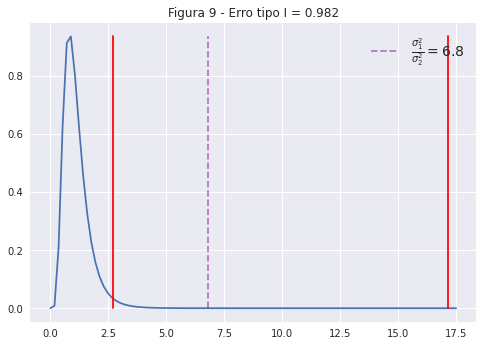

In [233]:
fig, ax = plt.subplots()
pdff = f.pdf(xrj, 19, 19)
ax.plot(xrj, pdff)
lim_inf, lim_sup = [np.min(pdff), np.max(pdff)]
one_x12, one_y12 = [ci_varrj[0],ci_varrj[0]],[lim_inf,lim_sup]
two_x12, two_y12 = [ci_varrj[1],ci_varrj[1]],[lim_inf,lim_sup]
rtx, rty =  [ratio1,ratio1],[lim_inf,lim_sup]
ax.plot(one_x12, one_y12, two_x12, two_y12, color='red')
ax.plot(rtx, rty, color='purple', alpha=0.5, ls='--', label=r'$\frac{\sigma_1^2}{\sigma_2^2}=6.8$',)
plt.legend(loc='upper right', prop={'size': 14})
plt.title("Figura 9 - Erro tipo I = {:.3f}".format(ei));

In [215]:
nrejeitar, f_var = dict_variaveis(1.4)
nratio1 = nrejeitar['x'].var(ddof=1)/nrejeitar['y'].var(ddof=1)
nratio2 = nrejeitar['y'].var(ddof=1)/nrejeitar['x'].var(ddof=1)
print (f_var, nratio1, nratio2)
pvalor = pvalue_var(nratio1, nratio2, 20, 20)
if f_var[0]<nratio1 and nratio1<f_var[1]:
    print ("Não rejeita ", nratio1, pvalor)
else:
    print ("Rejeita ", nratio1, pvalor)

(0.39581215954322335, 2.5264509335792606) 0.9704397373665443 1.0304606885881162
Não rejeita  0.9704397373665443 0.947170000999392


In [235]:
ci_var = CI_Var(nratio1, f_var[0], f_var[1])

In [236]:
ci_var

[0.38411184815361044, 2.451768380452118]

Nesse caso, os dois lados fora intervalo de confiança possuem área sob a curva, logo o erro tipo I pode ser obtido da seguinte forma:

In [242]:
ee = f.cdf(ci_var[0], 19, 19)
ed = 1 - f.cdf(ci_var[1], 19, 19) - ee
ei_nr = ee + ed
ei_nr

0.028815626163659513

In [241]:
1 - (ed-ee)

0.05044278555107973

In [234]:
x = np.linspace(0, 4, 100)

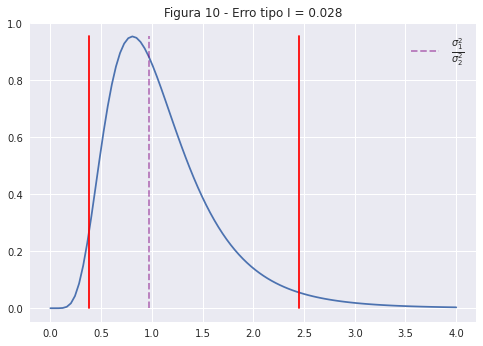

In [244]:
fig, ax = plt.subplots()
pdff = f.pdf(x, 19, 19)
ax.plot(x, pdff,)
lim_inf, lim_sup = [np.min(pdff), np.max(pdff)]
one_x12, one_y12 = [ci_var[0],ci_var[0]],[lim_inf,lim_sup]
two_x12, two_y12 = [ci_var[1],ci_var[1]],[lim_inf,lim_sup]
rtx, rty =  [nratio1,nratio1],[lim_inf,lim_sup]
ax.plot(one_x12, one_y12, two_x12, two_y12, color='red')
ax.plot(rtx, rty, color='purple', alpha=0.5, ls='--', label=r'$\frac{\sigma_1^2}{\sigma_2^2}$',)
plt.legend(prop={'size': 14})
plt.title("Figura 10 - Erro tipo I = 0.028");

$\frac{\sigma_1^2}{\sigma_2^2}$

In [255]:
f.cdf(ci_var[0], 19, 19)

0.02162715938742022

In [257]:
(1 - f.cdf(ci_var[1], 19, 19))+f.cdf(ci_var[0], 19, 19)

0.050442785551079734

# Questão 4

[Ver](https://stats.stackexchange.com/questions/475289/confidence-interval-for-2-sample-t-test-with-scipy)

In [2]:
np.random.seed(42) # para fins de reprodutibilidade
N = np.random.randint(1, 11)
sigma = np.sqrt(0.05*N)
X_4 = np.random.normal(loc=N, scale=sigma, size=1000)
# x(k+500)=x(k+500)+0.3*N*k/500
for k in range(0, 500, 1):
    X_4[k+500] = X_4[k+500] + 0.3*N*(k/500)

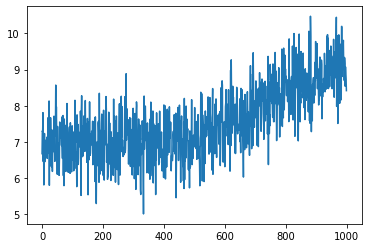

In [3]:
fig, ax = plt.subplots()
ax.plot(np.arange(1000), X_4);

In [12]:
def welch_ttest(x1, x2, a):
    
    n1 = x1.size
    n2 = x2.size
    m1 = np.mean(x1)
    m2 = np.mean(x2)
    
    v1 = np.var(x1, ddof=1)
    v2 = np.var(x2, ddof=1)
    
    pooled_se = np.sqrt(v1 / n1 + v2 / n2)
    delta = m1-m2
    
    tstat = delta /  pooled_se
    df = (v1 / n1 + v2 / n2)**2 / (v1**2 / (n1**2 * (n1 - 1)) + v2**2 / (n2**2 * (n2 - 1)))
    
    # two side t-test
    p = 2 * t.cdf(-abs(tstat), df)
    
    # upper and lower bounds
    lb = delta - t.ppf(1-a,df)*pooled_se 
    ub = delta + t.ppf(1-a,df)*pooled_se
    ci = [lb, ub]
    return ci, p

In [144]:
def e_I(m1, m2, v1, v2, n1=20, n2=20, alpha=0.05):
    ci_ = CI(m1, m2, var1=v1, var2=v2, n1=n1, n2=n2, alpha=alpha)
    denom = (v1/n1) + (v2/n2)
    z1x = (ci_[0]-(m1-m2))/denom
    e = norm.cdf(z1x)*2
    return e, ci_

$H_0$: não foi detectado erro, com nível de confiança de $0.05$

$H_1$: foi detectado erro

Erro tipo I é equivalente ao $\alpha
$

In [52]:
def testes(Ns, NC):
    erros = {'n':[], 'nc':[], 'tipo_i':[], 'tipo_ii':[]}
    for nc in NC:
        for n in Ns:
            a = 1 - nc
            palpha = 1 - a
            inicio_dados = X_4[:n]
            restante_dados = X_4[n:]
            m1, m2 = [inicio_dados.mean(), restante_dados.mean()]
            s1, s2 = [inicio_dados.var(ddof=1), restante_dados.var(ddof=1)]
            z0 = test_estatistico(m1, m2, 0, s1=s1, s2=s2, n1=len(inicio_dados), n2=len(restante_dados))    
            eii = erro_II(a, m1, m2, s1, s2, len(inicio_dados), len(restante_dados), 0)
            ei = erro_I(m1, m2, np.sqrt(s1), np.sqrt(s2), len(inicio_dados),len(restante_dados) )
            erros['tipo_i'].append(ei)
            erros['tipo_ii'].append(eii)
            erros['n'].append(n)
            erros['nc'].append(nc)
    return erros

In [53]:
Ns = np.linspace(20,100,3, dtype='int')
erros = testes(Ns, [0.90, 0.95, 0.97])

In [54]:
pd.DataFrame(erros)

,n,nc,tipo_i,tipo_ii
0,20,0.90,4.863074e-12,7.022332e-08
1,60,0.90,6.426428e-14,2.396089e-09
2,100,0.90,1.392053e-21,1.443290e-15
3,20,0.95,4.863074e-12,3.719210e-07
4,60,0.95,6.426428e-14,1.519958e-08
5,100,0.95,1.392053e-21,1.687539e-14
6,20,0.97,4.863074e-12,1.071620e-06
7,60,0.97,6.426428e-14,4.937865e-08
8,100,0.97,1.392053e-21,8.371082e-14
